In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv('processed_data/train_features.csv')

In [4]:
ranked_features = pd.read_csv('RF_feature_importance.csv',index_col=0)
feature_set = ranked_features[:25].index.to_numpy()
print(feature_set)
feature_set = '|'.join(feature_set)

['ch3_mav' 'ch3_wl' 'ch3_bp' 'ch2_mobility' 'ch3_ssc' 'ch3_complexity'
 'ch3_mobility' 'ch1_mobility' 'ch1_mav' 'ch2_complexity' 'ch3_activity'
 'ch4_wl' 'ch2_wl' 'ch3_rms' 'ch1_rms' 'ch1_complexity' 'ch4_bp'
 'ch1_activity' 'ch1_wl' 'ch1_var' 'ch4_mobility' 'ch4_zc' 'ch2_mf'
 'ch1_mf' 'ch4_pf']


In [5]:
# feature_set = 'mav|wl|var|zc'
feature_set = 'ch'

X = df.filter(regex=feature_set, axis=1)
y = df['label'].to_numpy()
y = np.array([n-1 for n in y])

In [6]:
test_df = pd.read_csv('processed_data/test_features.csv')
testX = test_df.filter(regex=feature_set, axis=1).to_numpy()
ytest = test_df['label'].to_numpy()
ytest = np.array([n-1 for n in ytest])

# Preprocess the data with scalers

In [7]:
scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.33, random_state=42)

In [9]:
Xtest = scaler.transform(testX)

/Users/alexiswu/Desktop/neurotech/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
pd.DataFrame(Xtest).describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.062792,0.036384,-0.017634,-0.031351,0.059112,0.024682,-0.041562,-0.089356,0.059112,-0.017216,...,-0.059879,-0.049137,0.014009,-0.021392,-0.030533,-0.074220,0.014009,-0.007540,0.061483,0.016709
std,1.217378,1.146392,0.979781,1.008181,1.252246,1.117662,0.905759,0.776553,1.252246,1.013356,...,0.896727,0.917139,1.067670,1.040462,1.032653,0.971027,1.067670,1.006288,0.976107,1.045354
min,-0.346084,-0.358860,-2.251929,-2.738380,-0.257212,-0.371614,-1.524305,-1.237171,-0.257212,-2.182210,...,-2.040367,-2.398362,-0.263296,-0.383949,-1.304469,-1.587733,-0.263296,-1.924103,-3.371804,-0.254050
25%,-0.317023,-0.339362,-0.628746,-0.690297,-0.257131,-0.355911,-0.869403,-0.743695,-0.257131,-0.709186,...,-0.607991,-0.673893,-0.263236,-0.370471,-0.855736,-0.761739,-0.263236,-0.821432,-0.487843,-0.254011
50%,-0.294645,-0.327200,-0.196441,0.097426,-0.256989,-0.343539,-0.062094,-0.250219,-0.256989,0.124123,...,-0.205135,0.047977,-0.263066,-0.355086,-0.337342,-0.431341,-0.263066,-0.232332,0.163269,-0.253883
75%,-0.218321,-0.262122,0.456094,0.609447,-0.255205,-0.280963,0.745980,0.489994,-0.255205,0.819632,...,0.317085,0.579354,-0.260267,-0.271895,0.535339,0.394653,-0.260267,0.921977,0.730729,-0.251695
max,7.990760,5.816320,2.870476,3.051391,7.696215,5.564058,1.676676,1.970421,7.696215,1.884828,...,2.734220,1.812550,6.041102,4.859904,2.344047,2.542238,6.041102,2.032943,2.145430,5.338785


# KNN
## Train

Cross-validation scores: [0.53636364 0.68807339 0.62385321 0.74311927 0.70642202]
Mean CV accuracy: 0.66
accuracy is: 0.6059479553903345 
 f1 score is: [0.56521739 0.66292135 0.59090909]


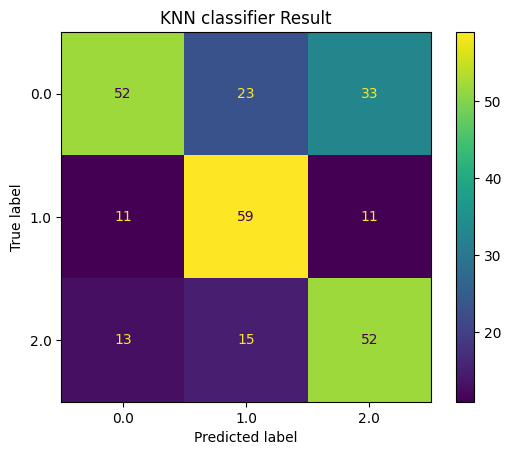

In [11]:

knn_grid = {
    'n_neighbors': [2, 3,4, 5,6, 7,8, 9,10, 11,13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, knn_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Output the best parameters
best_params_knn = grid_search_knn.best_params_
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)
cross_val_scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {cross_val_scores.mean():.2f}")

y_pred = knn_best.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(y_val, y_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.title("KNN classifier Result")
plt.savefig(f"result_plots/{feature_set}_KNN_train.png")

## Test

accuracy is: 0.7107843137254902 
 f1 score is: [0.66071429 0.70833333 0.75      ]


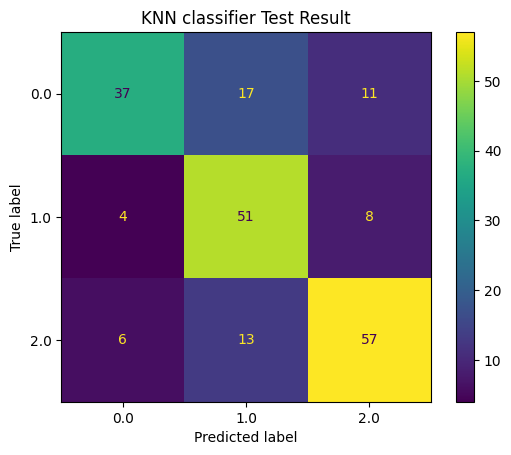

In [12]:
test_pred = knn_best.predict(Xtest)
accuracy = accuracy_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(ytest, test_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.title("KNN classifier Test Result")
plt.savefig(f"result_plots/{feature_set}_KNN_test.png")

# SVM


## Train


In [ ]:
svm_grid ={
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid']

} 

svm = SVC()
grid_search_svm = GridSearchCV(svm, svm_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
svm_best = SVC(**best_params_svm)
svm_best.fit(X_train, y_train)
y_pred = svm_best.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(y_val, y_pred, labels=svm_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_best.classes_)
disp.plot()
plt.title("SVM classifier Result")
plt.savefig(f"result_plots/{feature_set}_SVM_train.png")

## Test

In [ ]:
test_pred = svm_best.predict(Xtest)
accuracy = accuracy_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(ytest, test_pred, labels=svm_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_best.classes_)
disp.plot()
plt.title("SVM classifier Test Result")
plt.savefig(f"result_plots/{feature_set}_SVM_test.png")

# Random Forest

In [11]:
import joblib


accuracy is: 0.7509293680297398 
 f1 score is: [0.7715736  0.78787879 0.69318182]


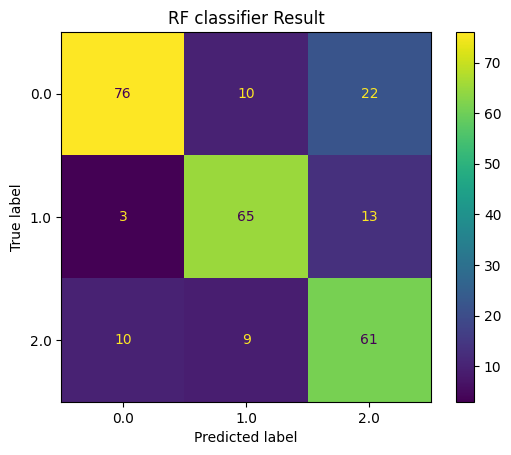

In [45]:
rf_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest.
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in each decision tree.
    'min_samples_split': [2, 5, 10],  # Minimum number of data points placed in a node before the node is split.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of data points allowed in a leaf node.
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement).
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, rf_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
rf_best = RandomForestClassifier(**best_params_rf)
# rf_best = joblib.load('models/selected_feature_RF.pkl')
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(y_val, y_pred, labels=rf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_best.classes_)
disp.plot()
plt.title("RF classifier Result")
plt.savefig(f"result_plots/selected_feature_RF_train.png")

accuracy is: 0.7303921568627451 
 f1 score is: [0.70967742 0.76923077 0.71428571]


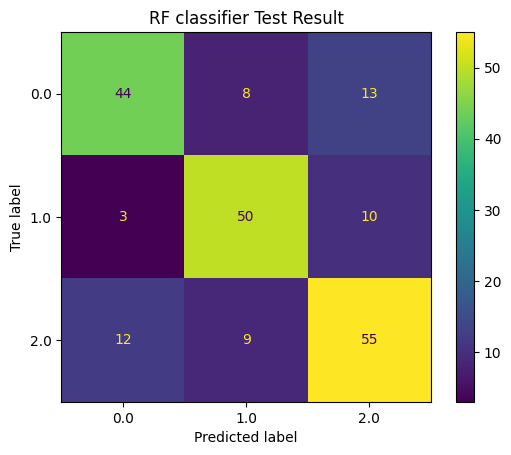

In [46]:
test_pred = rf_best.predict(Xtest)
accuracy = accuracy_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(ytest, test_pred, labels=rf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_best.classes_)
disp.plot()
plt.title("RF classifier Test Result")
plt.savefig(f"result_plots/selected_feature_RF_test.png")

In [ ]:
import joblib
joblib.dump(rf_best, f"models/selected_feature_RF.pkl")
joblib.dump(scaler, f"models/selected_feature_RF_scaler.pkl")

In [15]:
importance = rf_best.feature_importances_
importance = pd.DataFrame(importance, index=df.columns[:-1], columns=['importance']).sort_values('importance', ascending=False)
importance.to_csv(f"RF_feature_importance.csv")

In [37]:
importance.sort_values('importance', ascending=True, inplace=True)

Text(0.5, 1.0, 'Feature Importance')

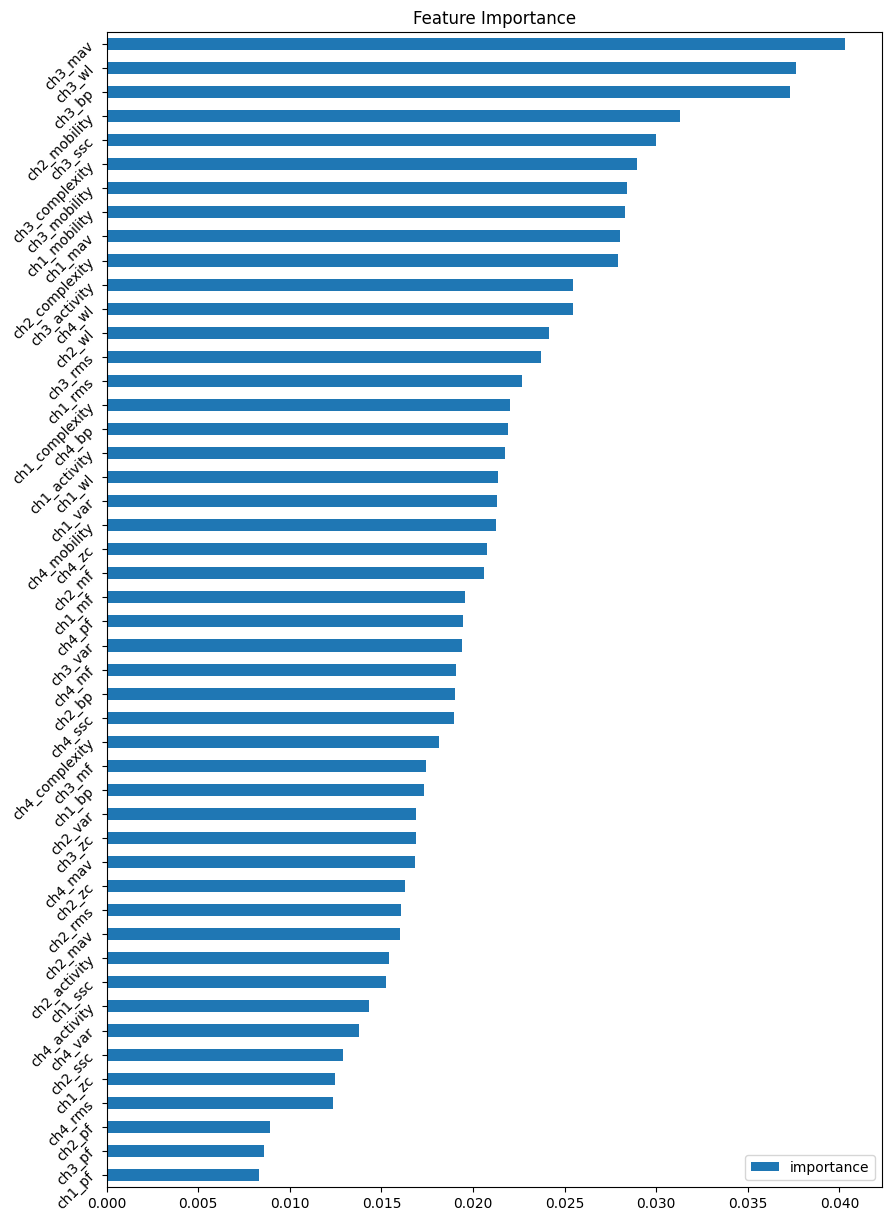

In [38]:

ax = importance.plot.barh(figsize=(10,15))
ax.set_yticklabels(importance.index,rotation=45)
plt.title("Feature Importance")

